![](framework2.png)

## Definição do problema
- **Classificar** a iris (planta) entre entre três tipos mostrados: setosa, versicollor e virgínica

## Dados

![](iris.png)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
retorno = load_iris()

In [3]:
retorno

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## Preparação dos dados

![](framework3.png)

In [4]:
def defineNomes(target):
    if(target == 0):
        return 'setosa'
    elif(target == 1):
        return 'versicolor'
    elif(target == 2):
        return 'virginica'

In [5]:
iris = pd.DataFrame(retorno.data)
iris.columns = ['comprimento da sépala','largura da sépala','comprimento da pétala','largura da pétala']

In [6]:
iris['target'] = retorno.target
iris['target_name'] = iris['target'].apply(defineNomes)

In [7]:
display(iris)

,comprimento da sépala,largura da sépala,comprimento da pétala,largura da pétala,target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


## Análise Exploratória

In [8]:
iris.describe()

,comprimento da sépala,largura da sépala,comprimento da pétala,largura da pétala,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,12)})
sns.set_theme(style="white")

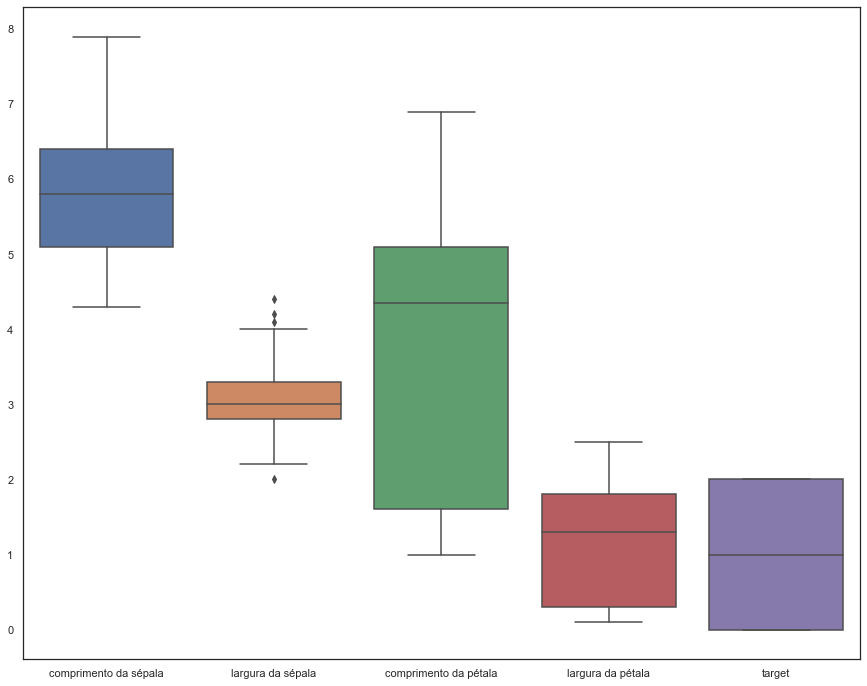

In [10]:
ax = sns.boxplot(data=iris)

In [11]:
# Vamos verificar os outliers
iris[(iris['largura da sépala'] < 2.2) | (iris['largura da sépala'] > 4)]

,comprimento da sépala,largura da sépala,comprimento da pétala,largura da pétala,target,target_name
15,5.7,4.4,1.5,0.4,0,setosa
32,5.2,4.1,1.5,0.1,0,setosa
33,5.5,4.2,1.4,0.2,0,setosa
60,5.0,2.0,3.5,1.0,1,versicolor


In [12]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   comprimento da sépala  150 non-null    float64
 1   largura da sépala      150 non-null    float64
 2   comprimento da pétala  150 non-null    float64
 3   largura da pétala      150 non-null    float64
 4   target                 150 non-null    int32  
 5   target_name            150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [13]:
iris.corr()

,comprimento da sépala,largura da sépala,comprimento da pétala,largura da pétala,target
comprimento da sépala,1.000000,-0.117570,0.871754,0.817941,0.782561
largura da sépala,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
comprimento da pétala,0.871754,-0.428440,1.000000,0.962865,0.949035
largura da pétala,0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


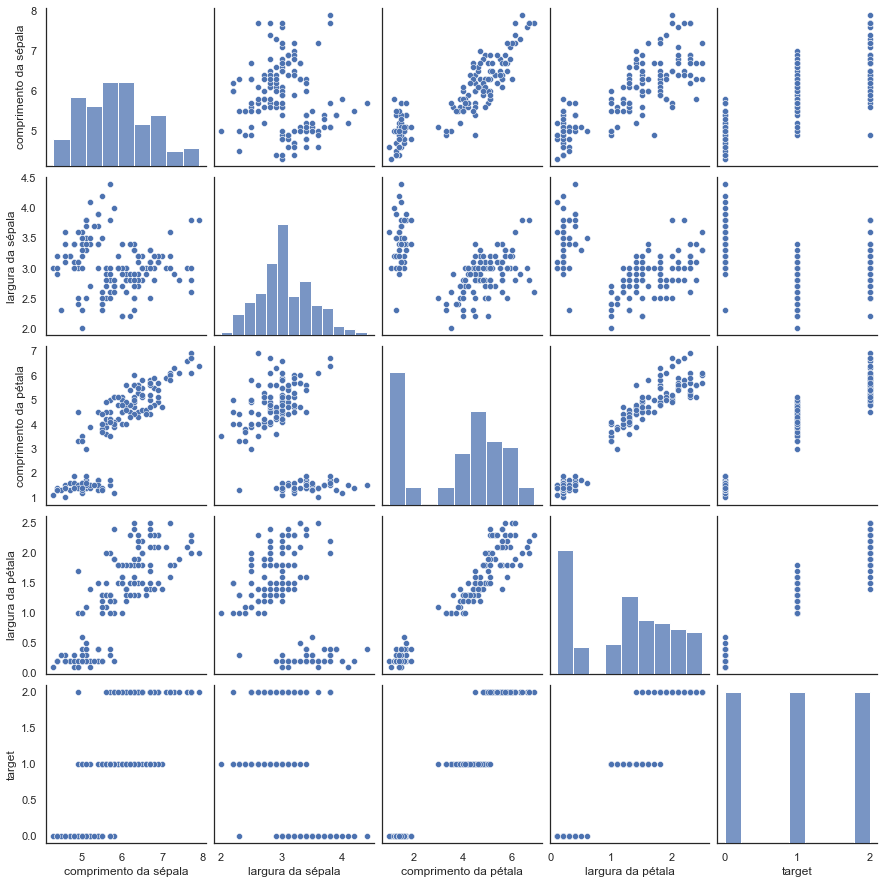

In [14]:
ax = sns.pairplot(iris)

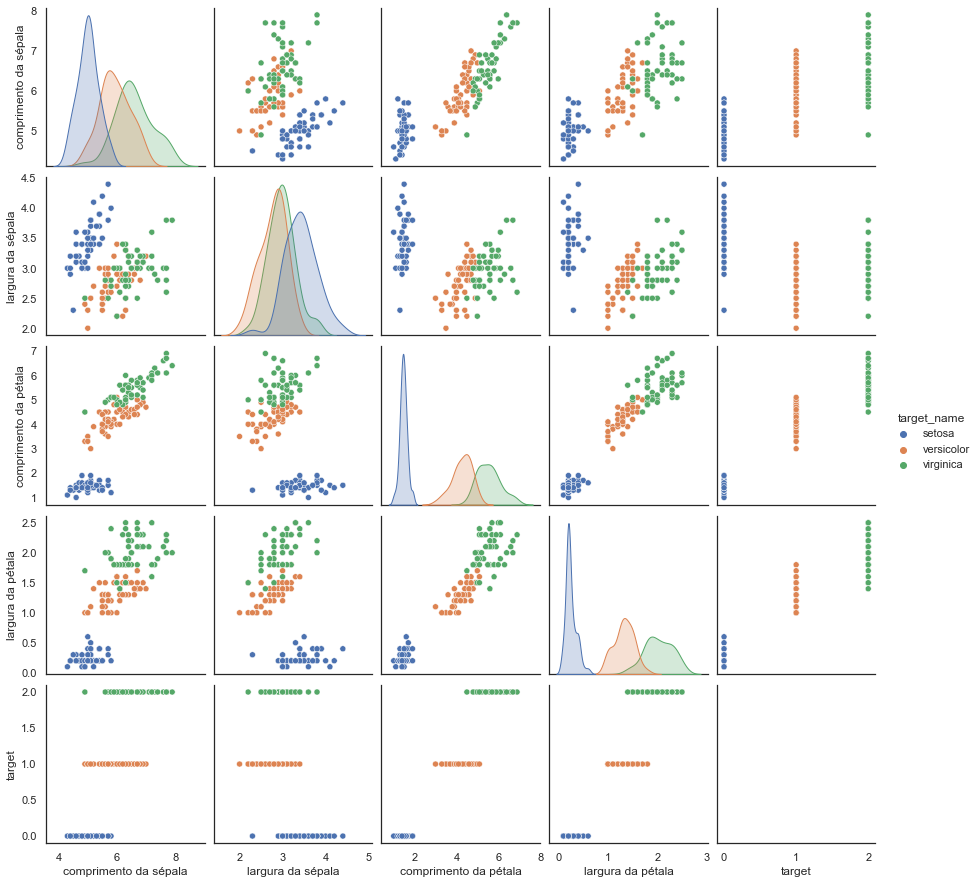

In [15]:
ax = sns.pairplot(iris, hue='target_name')

## Tratamento dos dados

![](framework4.png)

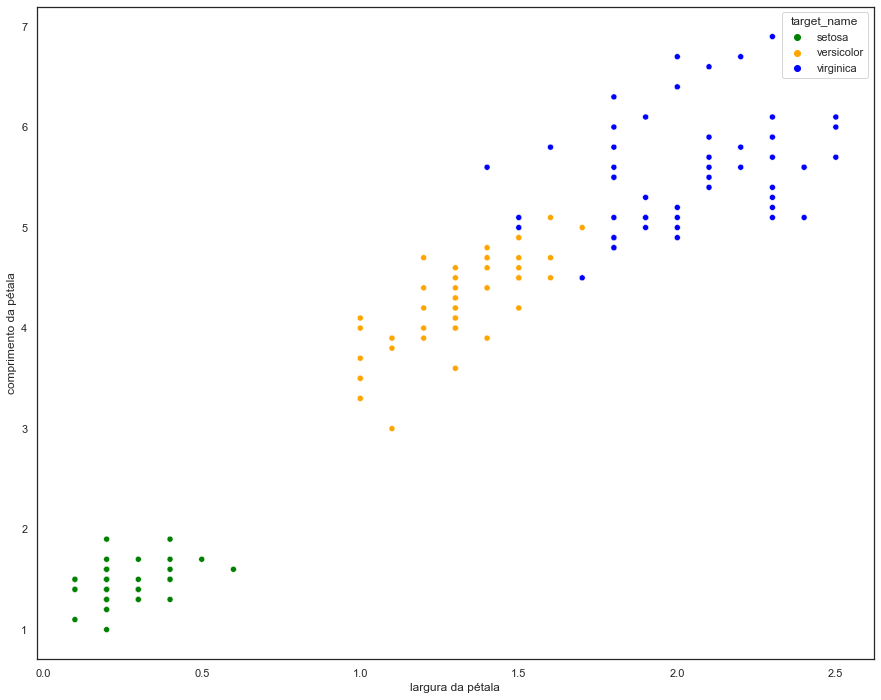

In [16]:
sns.scatterplot(x='largura da pétala',y='comprimento da pétala',data=iris, hue='target_name',palette=['green','orange','blue'])
plt.show()

### Separando em treino e teste

In [18]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(retorno.data,retorno.target,random_state=1)

In [19]:
treino = pd.DataFrame(x_treino)
treino.columns = ['comprimento da sépala','largura da sépala','comprimento da pétala','largura da pétala']
treino['target'] = y_treino

In [20]:
display(treino)

,comprimento da sépala,largura da sépala,comprimento da pétala,largura da pétala,target
0,6.5,2.8,4.6,1.5,1
1,6.7,2.5,5.8,1.8,2
2,6.8,3.0,5.5,2.1,2
3,5.1,3.5,1.4,0.3,0
4,6.0,2.2,5.0,1.5,2
...,...,...,...,...,...
107,6.3,2.8,5.1,1.5,2
108,6.4,3.1,5.5,1.8,2
109,6.3,2.5,4.9,1.5,1
110,6.7,3.1,5.6,2.4,2


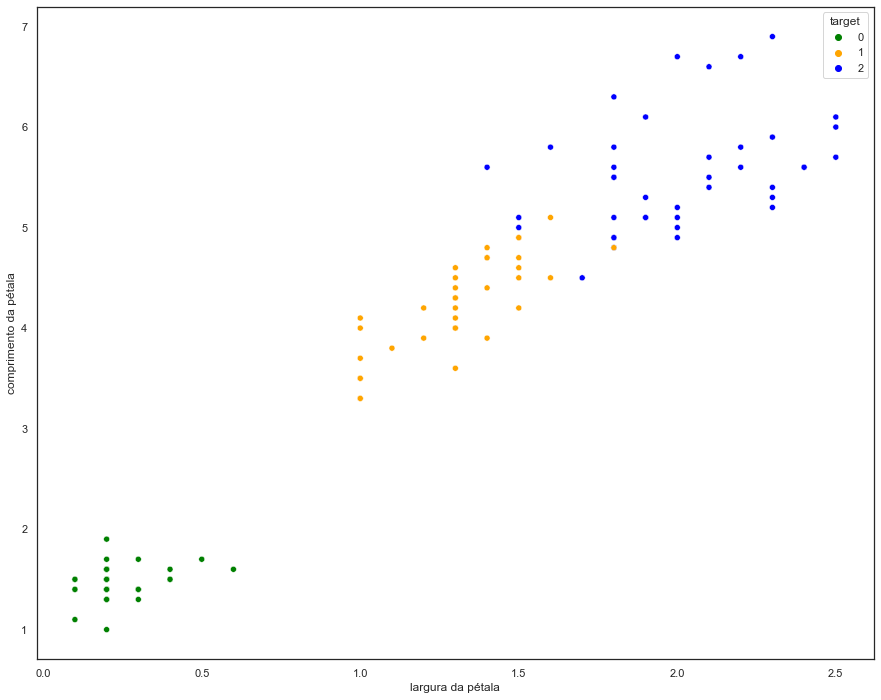

In [21]:
sns.scatterplot(x='largura da pétala',y='comprimento da pétala',data=treino, hue='target',palette=['green','orange','blue'])
plt.show()

### Outra opção de curva
![](imagem3.png)

In [51]:
treino[(treino['target'] == 2) & ((treino['largura da pétala'] == 1.7) | (treino['largura da pétala'] == 1.5))]

,comprimento da sépala,largura da sépala,comprimento da pétala,largura da pétala,target
4,6.0,2.2,5.0,1.5,2
81,4.9,2.5,4.5,1.7,2
107,6.3,2.8,5.1,1.5,2


### Traçando as duas retas

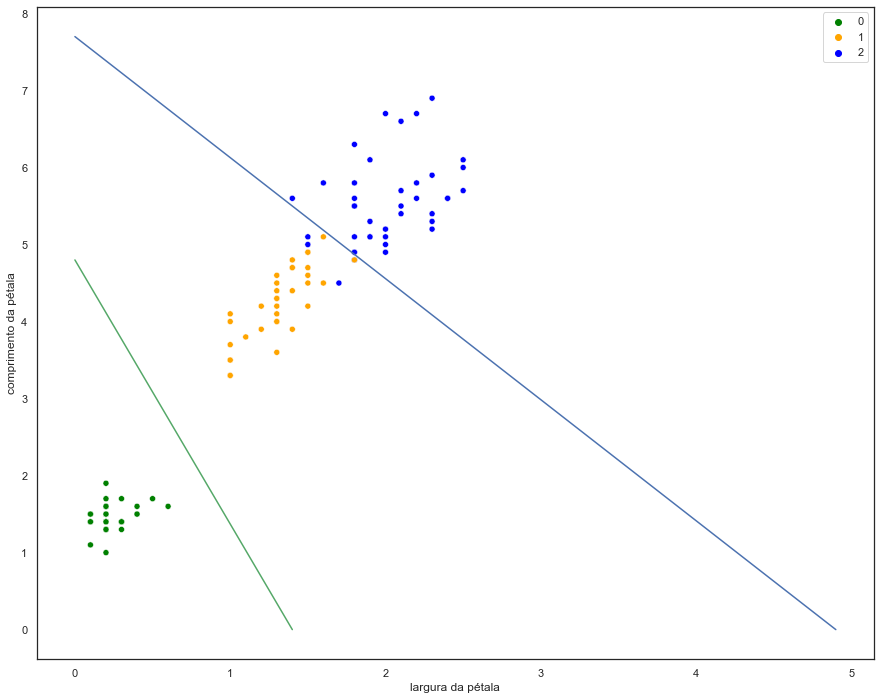

In [52]:
sns.scatterplot(x='largura da pétala',y='comprimento da pétala',data=treino, hue='target',palette=['green','orange','blue'])
x_verde = [0,1.4]
y_verde = [4.8,0]
sns.lineplot(x = x_verde,y = y_verde,color='g')
x_azul = [0,4.9]
y_azul = [7.7,0]
sns.lineplot(x = x_azul,y = y_azul,color='b')
plt.show()

### Tratar os dados de teste

In [53]:
teste = pd.DataFrame(x_teste)
teste.columns = ['comprimento da sépala','largura da sépala','comprimento da pétala','largura da pétala']
teste['target'] = y_teste

In [54]:
display(teste)

,comprimento da sépala,largura da sépala,comprimento da pétala,largura da pétala,target
0,5.8,4.0,1.2,0.2,0
1,5.1,2.5,3.0,1.1,1
2,6.6,3.0,4.4,1.4,1
3,5.4,3.9,1.3,0.4,0
4,7.9,3.8,6.4,2.0,2
5,6.3,3.3,4.7,1.6,1
6,6.9,3.1,5.1,2.3,2
7,5.1,3.8,1.9,0.4,0
8,4.7,3.2,1.6,0.2,0
9,6.9,3.2,5.7,2.3,2


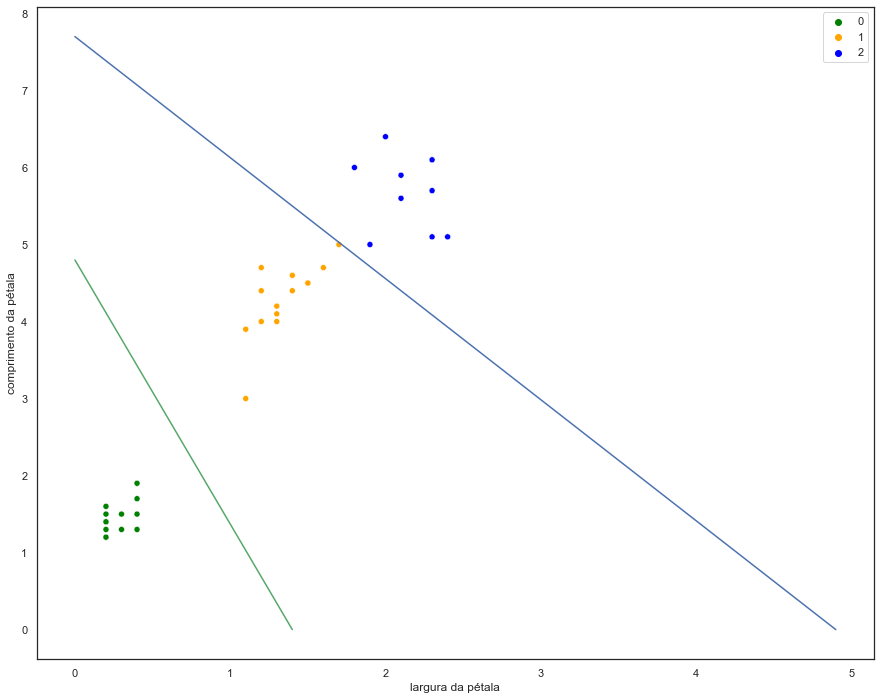

In [55]:
sns.scatterplot(x='largura da pétala',y='comprimento da pétala',data=teste, hue='target',palette=['green','orange','blue'])
x_verde = [0,1.4]
y_verde = [4.8,0]
sns.lineplot(x = x_verde,y = y_verde,color='g')
x_azul = [0,4.9]
y_azul = [7.7,0]
sns.lineplot(x = x_azul,y = y_azul,color='b')
plt.show()

![](framework5.png)

# Usando Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
modelo = RandomForestClassifier()

In [58]:
modelo.fit(x_treino,y_treino)

RandomForestClassifier()

In [59]:
predicao = modelo.predict(x_teste)

In [60]:
predicao

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0])

In [62]:
teste['predicao'] = predicao
teste['check'] = teste['target'] == teste['predicao']
display(teste)

,comprimento da sépala,largura da sépala,comprimento da pétala,largura da pétala,target,predicao,check
0,5.8,4.0,1.2,0.2,0,0,True
1,5.1,2.5,3.0,1.1,1,1,True
2,6.6,3.0,4.4,1.4,1,1,True
3,5.4,3.9,1.3,0.4,0,0,True
4,7.9,3.8,6.4,2.0,2,2,True
5,6.3,3.3,4.7,1.6,1,1,True
6,6.9,3.1,5.1,2.3,2,2,True
7,5.1,3.8,1.9,0.4,0,0,True
8,4.7,3.2,1.6,0.2,0,0,True
9,6.9,3.2,5.7,2.3,2,2,True


In [63]:
teste[teste.check == False]


,comprimento da sépala,largura da sépala,comprimento da pétala,largura da pétala,target,predicao,check
22,6.7,3.0,5.0,1.7,1,2,False
